# 機械学習をPythonで実践する-10　　～ SVM ～

In [29]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import product
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize
# import statsmodels.api as sma
from sklearn.model_selection import train_test_split ,LeaveOneOut, cross_val_score, KFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, log_loss, confusion_matrix,ConfusionMatrixDisplay, \
accuracy_score, precision_score, recall_score,precision_recall_curve,f1_score,roc_curve,auc
from scipy.stats import hmean
from sklearn.decomposition import PCA
import plotly.express as px
# from sklearn.pipeline import Pipeline
# from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import fetch_openml
import time
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

%matplotlib inline
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## ○ SVM
* sklearn.svm.SVCクラスでSVMによる分類ができる。SVC：Support Vector Classifier
    * C: エラーの正則化項の係数
    * kernel: 使用するカーネル
        * linear
        * polynomial
        * rbf
        * sigmoid tanh
    * degree: polynomialのd (デフォルトは3)
    * gamma: ‘poly’, ‘rbf’, ‘sigmoid’, の係数$\gamma$
        * ‘scale’(デフォルト):  $\frac{1}{n\times Var(X)}$
        * ’auto’:  $\frac{1}{n}$
    * .support_vectors_でサポートベクトルのリストを取得
<br></br>
* 回帰はsklearn.svm.SVR(Regressor)

In [6]:
# irisデータの用意。
df = sns.load_dataset('iris')
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

In [14]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# 可視化するためにPCAで特徴量を２次元に圧縮する。テストデータではfitしないことに注意
n_components=2
pca = PCA(n_components=n_components)
# 復習：fitで主成分を求め、transformで主成分へ写像する
X_train_pc = pca.fit_transform(X_train)
X_test_pc = pca.transform(X_test)

In [56]:
# 学習。kernelにリニアを指定
model = SVC(kernel='linear')
model.fit(X_train_pc, y_train)

SVC(kernel='linear')

In [57]:
# 予測
y_pred = model.predict(X_test_pc)

In [58]:
# accuracyで評価
accuracy_score(y_test, y_pred)

0.9111111111111111

In [59]:
# サポートベクターの確認
model.support_vectors_

array([[-2.01808086, -2.16076222],
       [-1.83691058,  0.22264198],
       [ 0.68991796,  0.71639709],
       [ 1.01841242,  0.75406273],
       [ 1.14259734,  0.50582016],
       [-0.59799672, -1.47307272],
       [ 1.00108719, -1.69126085],
       [ 0.21435381, -1.74582022],
       [ 0.76807504,  0.17465618],
       [ 0.58546256, -0.11934379],
       [-0.65005847, -1.76724016],
       [ 0.78292811,  0.42709078],
       [ 1.05347893, -1.00878745],
       [ 1.24654811,  0.22456375],
       [ 0.8060938 , -0.04480644],
       [ 0.67115053,  0.36047773],
       [ 0.83577732, -1.44733591],
       [ 1.36078095,  0.15396725],
       [ 1.18175475, -0.56575389],
       [ 0.9792362 , -0.36356179],
       [ 0.21142607, -1.52270906],
       [ 1.01399725, -0.74821922],
       [ 0.86207563, -0.06985412],
       [ 1.28474342,  0.5928925 ],
       [ 1.326855  ,  0.92380604],
       [ 1.08677516, -1.21143932],
       [ 0.82552169, -0.03239705],
       [ 1.52725209,  0.96532955],
       [ 1.01399725,

上記の中にはX_train_pcのうちサポートベクターとして使われたもの、マージン内に入っているデータ、誤分類したデータを含んでいる。

## ○ 決定境界とサポートベクターの可視化
sklearn.inspection.DecisionBoundaryDisplayで決定境界を可視化できる。  
→.from_estimator(model, X)で描画

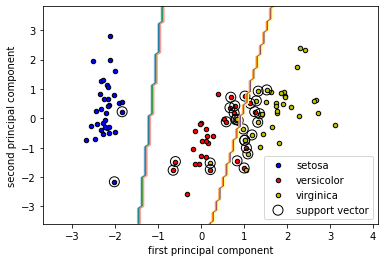

In [60]:
# 決定境界の描画。横軸は第1主成分、縦軸は第2主成分とする。
DecisionBoundaryDisplay.from_estimator(model, 
                                       X_train_pc,
                                       plot_method='contour',
                                       cmap=plt.cm.Paired,
                                       xlabel='first principal component',
                                       ylabel='second principal component'
                                      )

# 学習データも描画する。'bry'はblue,red,yellowの略。文字列にすることで一文字ずつforループされる
for class_, color in zip(model.classes_, 'bry'):
    # classごとのインデックスを取得。
    idx = np.where(y_train == class_)
    plt.scatter(X_train_pc[idx, 0],
                X_train_pc[idx, 1],
                c=color,
                label=class_,
                edgecolor='black',
                s=20
               )

# サポートベクターの描画。※マージン内に入っているデータ、誤分類のデータも含む
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1],
            s=100,
            #facecolorをNoneにすると、塗りつぶしなしの点になる
            facecolor='none',
            linewidth = 1,
            edgecolor = 'black',
            label = 'support vector'
           )

plt.legend()

※kernelがpolyの場合  
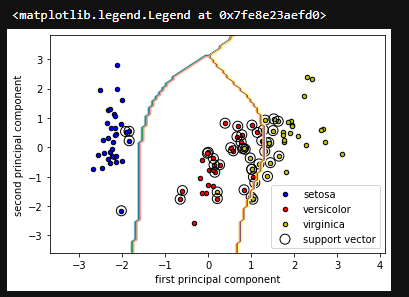  

※kernelがpoly,C=100の場合  
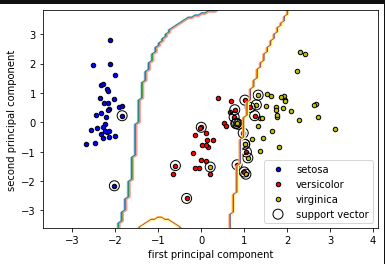

Cを大きくすると、マージンが狭まっていることが分かる。  
CはSVMの損失関数において正則化項の役割のため、Cを大きくするとマージンに入るデータおよび誤分類の項は小さくならざるを得ない（=マージンが狭まる）。  

-------以下、補足--------

In [34]:
list(zip(model.classes_, 'bry'))

[('setosa', 'b'), ('versicolor', 'r'), ('virginica', 'y')]

In [39]:
# np.whereを使うことで指定条件に合致するインデックスを返す。
np.where(y_train == 'setosa')

(array([ 16,  23,  24,  27,  28,  30,  33,  37,  42,  43,  46,  48,  51,
         52,  54,  55,  56,  60,  61,  62,  65,  66,  68,  73,  75,  77,
         78,  80,  89,  93,  98,  99, 100, 104]),)